<a href="https://colab.research.google.com/github/dcnith/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

We will examine a dataset with Ecommerce Customer Data for a company's website.
Then we will build a regression model that will predict the customer's yearly spend on the company's product.

<h4>Table of contents</h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Linear Regression with Python</a></li>
        <li><a href="#ref2">Linear Regression with Pyspark</a></li>
    </ol>
</div>
<br>


<a id="ref1"></a>
## Linear Regression with Python

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [5]:
import os
print(os.getcwd())

/content


<h3 id="understanding_data">Understanding the Data</h3>

In [8]:
from google.colab import files

uploaded = files.upload()

Saving Ecommerce_Customers.csv to Ecommerce_Customers.csv


In [9]:
df = pd.read_csv("Ecommerce_Customers.csv")
# take a look at the dataset
df.head(3)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


Lets select some features that we want to use for regression.

In [10]:
cdf = df[["Avg Session Length", "Time on App",
               "Time on Website",'Length of Membership',"Yearly Amount Spent"]]
cdf.head(3)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


Lets plot Yearly Amount Spent values with respect to Length of Membership:

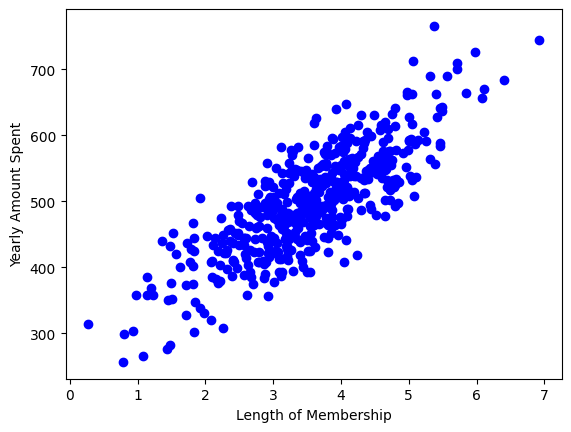

In [11]:
plt.scatter(cdf[["Length of Membership"]], cdf[["Yearly Amount Spent"]],  color='blue')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

In reality, there are __multiple variables__ that predict the Yearly Amount Spent. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting Yearly Amount Spent using Avg Session Length, Time on App, Time on Website and Length of Membership. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [12]:
msk = np.random.rand(len(df)) < 0.8

In [13]:
train = cdf[msk]
test = cdf[~msk]

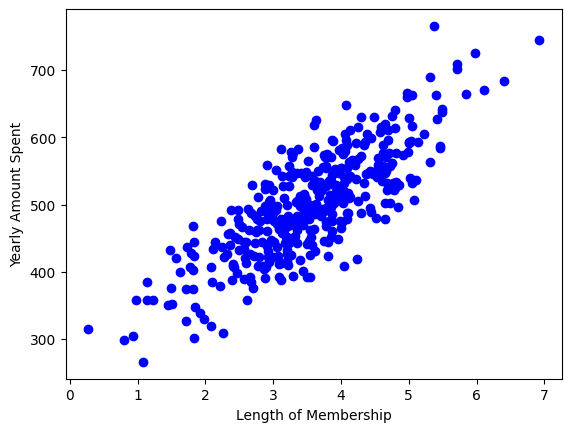

In [14]:
#### Train data distribution
plt.scatter(train[["Length of Membership"]], train[["Yearly Amount Spent"]],  color='blue')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

In [15]:
inputCols=["Avg Session Length", "Time on App",
               "Time on Website",'Length of Membership']

In [16]:
x = np.asanyarray(train[inputCols])
y = np.asanyarray(train[['Yearly Amount Spent']])

In [17]:
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[25.83735075 38.94184321  0.35757614 61.46271747]]


__Coefficient__ and __Intercept__ , are the parameters of the fit line.
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

<h2 id="prediction">Prediction</h2>

In [18]:
y_hat= regr.predict(test[inputCols])
x = np.asanyarray(test[inputCols])
y = np.asanyarray(test[['Yearly Amount Spent']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 101.90
Variance score: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

<a id="ref2"></a>
### Linear Regression with Pyspark

First thing to do is start a Spark Session

In [ ]:
import findspark

In [ ]:
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('lr_example').getOrCreate()

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
# Use Spark to read in the Ecommerce Customers csv file.
data = spark.read.csv("Ecommerce_Customers.csv",inferSchema=True,header=True)

In [ ]:
# Print the Schema of the DataFrame
data.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [ ]:
# The data should to be in the form of two columns
# ("label","features")
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
data.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [ ]:
assembler = VectorAssembler(
    inputCols=["Avg Session Length", "Time on App",
               "Time on Website",'Length of Membership'],
    outputCol="features")

In [ ]:
output = assembler.transform(data)

In [ ]:
output.select("features").show(3)

+--------------------+
|            features|
+--------------------+
|[34.4972677251122...|
|[31.9262720263601...|
|[33.0009147556426...|
+--------------------+
only showing top 3 rows



In [ ]:
output.show(1)

+--------------------+--------------------+------+------------------+-----------------+-----------------+--------------------+-------------------+--------------------+
|               Email|             Address|Avatar|Avg Session Length|      Time on App|  Time on Website|Length of Membership|Yearly Amount Spent|            features|
+--------------------+--------------------+------+------------------+-----------------+-----------------+--------------------+-------------------+--------------------+
|mstephenson@ferna...|835 Frank TunnelW...|Violet| 34.49726772511229|12.65565114916675|39.57766801952616|  4.0826206329529615|  587.9510539684005|[34.4972677251122...|
+--------------------+--------------------+------+------------------+-----------------+-----------------+--------------------+-------------------+--------------------+
only showing top 1 row



In [ ]:
final_data = output.select("features",'Yearly Amount Spent')

In [ ]:
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [ ]:
final_data.show(3)

+--------------------+-------------------+
|            features|Yearly Amount Spent|
+--------------------+-------------------+
|[34.4972677251122...|  587.9510539684005|
|[31.9262720263601...|  392.2049334443264|
|[33.0009147556426...| 487.54750486747207|
+--------------------+-------------------+
only showing top 3 rows



Finally we have two columns , one with the names   "features" and the second "Yearly Amount Spent.

-- The feature column has inside of it a vector of all the features that belong to that row.

-- The "label Yearly Amount Spent " column then needs to have the numerical label, either a regression numerical value, or a numerical value that matches to a classification grouping.

We  separated our data set into a training and test set.

In [ ]:
# Pass in the split between training/test as a list.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [ ]:
#train_data.show(1)

In [ ]:
#test_data.show(1)

In [ ]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [ ]:
# Create a Linear Regression Model object
lr = LinearRegression(labelCol='Yearly Amount Spent')

In [ ]:
# Fit the model to the data and call this model lrModel
lrModel = lr.fit(train_data,)

Now we only train on the train_data

In [ ]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [25.653882207112016,38.97921920533161,-0.05250030143171747,61.37838420015769] Intercept: -1032.8799998886036


Now we can directly get a .summary object using the evaluate method:

In [ ]:
test_results = lrModel.evaluate(test_data)

In [ ]:
test_results.residuals.show()
print("RMSE: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
| -6.665379671086896|
| -4.865141028678352|
|-22.790142442518913|
| -8.005202843053212|
|  -5.41103848693092|
| 1.8566040859051327|
| 0.6796580297393575|
| 2.3640811104828003|
| -5.921727564208709|
| 3.2316105287632695|
| -15.14333705737863|
| 17.291636042813025|
|-27.025040542293596|
| -7.498907308985679|
| -19.17351688816467|
|  7.339699442561539|
| -2.990470416561152|
|-17.822792588707046|
| -14.35549715503339|
|  4.424819677556343|
+-------------------+
only showing top 20 rows

RMSE: 10.608638076962102


Well that is nice, but realistically we will eventually want to test this model against unlabeled data, after all, that is the whole point of building the model in the first place. We can again do this with a convenient method call, in this case, transform(). Which was actually being called within the evaluate() method. Let's see it in action:

In [ ]:
unlabeled_data = test_data.select('features')

<h2 id="prediction">Prediction</h2>

In [ ]:
predictions = lrModel.transform(unlabeled_data)

In [ ]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[30.4925366965402...| 289.1366253910014|
|[30.8794843441274...|  495.071741013533|
|[31.1239743499119...| 509.7371962822847|
|[31.1280900496166...| 565.2578895901079|
|[31.2681042107507...|428.88157166075484|
|[31.3091926408918...| 430.8641137540285|
|[31.3895854806643...|409.38995303024353|
|[31.4459724827577...|482.51288382464577|
|[31.5257524169682...| 449.8873543740906|
|[31.5316044825729...| 433.2839952005993|
|[31.5741380228732...| 559.5526092179655|
|[31.6005122003032...| 461.8812154482839|
|[31.6739155032749...| 502.7501084521748|
|[31.7242025238451...| 510.8867945969462|
|[31.8164283341993...|  520.296008391821|
|[31.8209982016720...| 417.3355815706518|
|[31.8627411090001...| 559.2886115906078|
|[31.9048571310136...| 491.7726500115232|
|[31.9365486184489...| 441.5548820503616|
|[31.9764800614612...|326.16962635654386|
+--------------------+------------

In [ ]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))

RMSE: 10.608638076962102
MSE: 112.54320184797014
